<a href="https://colab.research.google.com/github/MatiasHolmemoMardal/FastMONAI/blob/main/FastMONAI_MedMNIST_Single_label_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FastMONAI Single-label classification



## Install FastMONAI and MedMNIST v2 dataset

In [ ]:
pip install fastMONAI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.8/172.8 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 KB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 6.2 MB/s eta 0:00:00
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.11
    Uninstalling fastai-2.7.11:
      Successfully uninstalled fastai-2.7.11


In [ ]:
!pip install medmnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116949 sha256=e0957c86ff74940ddf70a1ae097d07d36599c32ad3a85646e1fdd24f03181949
  Stored in directory: /root/.cache/pip/wheels/f7/f1/89/b9ea2bf8f80ec027a88fef1d354b3816b4d3d29530988972f6
Successfully built fire


### Import vision from fastMONAI

In [ ]:
from fastMONAI.vision_all import *
import pandas as pd
import os
import numpy as np

## Download NoduleMNIST3D from MedMNIST

In [ ]:
path = Path('../data')
path.mkdir(exist_ok=True)

In [ ]:
train_val_df, test_df = download_NoduleMNIST3D(path=path)

2023-03-12 18:49:39,124 - INFO - Expected md5 is None, skip md5 check for file ../data/NoduleMNIST3D/NoduleMNIST3D.npz.
2023-03-12 18:49:39,126 - INFO - File exists: ../data/NoduleMNIST3D/NoduleMNIST3D.npz, skipped downloading.


In [ ]:
df = pd.concat([train_val_df, test_df], ignore_index=True)

## Get information about the data

Cant use MedDataset() because the dataset is not on dicom form

In [ ]:
test_df.shape

(310, 3)

In [ ]:
train_val_df.shape

(1323, 3)

In [ ]:
train_val_df.head()

,img_path,labels,is_val
0,../data/NoduleMNIST3D/train_images/0_nodule.nii.gz,b,False
1,../data/NoduleMNIST3D/train_images/1_nodule.nii.gz,m,False
2,../data/NoduleMNIST3D/train_images/2_nodule.nii.gz,m,False
3,../data/NoduleMNIST3D/train_images/3_nodule.nii.gz,b,False
4,../data/NoduleMNIST3D/train_images/4_nodule.nii.gz,b,False


In [ ]:
test_df.head()

,img_path,labels,is_val
0,../data/NoduleMNIST3D/test_images/0_nodule.nii.gz,b,False
1,../data/NoduleMNIST3D/test_images/1_nodule.nii.gz,b,False
2,../data/NoduleMNIST3D/test_images/2_nodule.nii.gz,b,False
3,../data/NoduleMNIST3D/test_images/3_nodule.nii.gz,b,False
4,../data/NoduleMNIST3D/test_images/4_nodule.nii.gz,b,False


In [ ]:
df.head()

,img_path,labels,is_val
0,../data/NoduleMNIST3D/train_images/0_nodule.nii.gz,b,False
1,../data/NoduleMNIST3D/train_images/1_nodule.nii.gz,m,False
2,../data/NoduleMNIST3D/train_images/2_nodule.nii.gz,m,False
3,../data/NoduleMNIST3D/train_images/3_nodule.nii.gz,b,False
4,../data/NoduleMNIST3D/train_images/4_nodule.nii.gz,b,False


# Load the images

In [ ]:
dls = MedImageDataLoaders.from_df(df=train_val_df, fn_col='img_path', label_col='labels', 
        resample=1, item_tfms=[ZNormalization(), PadOrCrop(size=28)], bs=4)

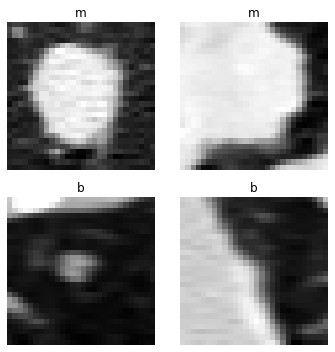

In [ ]:
dls.show_batch(figsize=(5,5),anatomical_plane=2)

## Import classifier model from MONAI and train

In [ ]:
from monai.networks.nets import Classifier

model = Classifier(in_shape=[1, 28, 28, 28], classes=2, 
    channels=(8, 16, 32, 64, 128), strides=(2, 2, 2, 2))

In [ ]:
learn = Learner(dls, model, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.458154,0.451594,0.825758,00:23
1,0.386965,0.408866,0.818182,00:26
2,0.087313,0.575879,0.806818,00:23


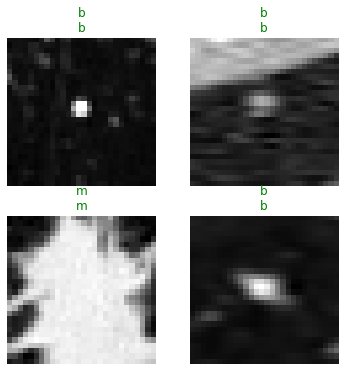

In [ ]:
learn.show_results(anatomical_plane=2)

## Save model

In [ ]:
learn.save('model-1')

Path('models/model-1.pth')

## Load model and plot confusion matrix, classification report and top losses

In [ ]:
learn.load('model-1');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

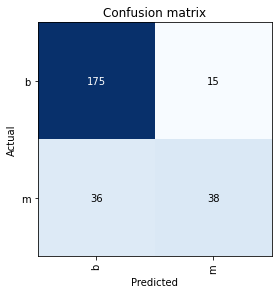

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

           b       0.83      0.92      0.87       190
           m       0.72      0.51      0.60        74

    accuracy                           0.81       264
   macro avg       0.77      0.72      0.74       264
weighted avg       0.80      0.81      0.80       264



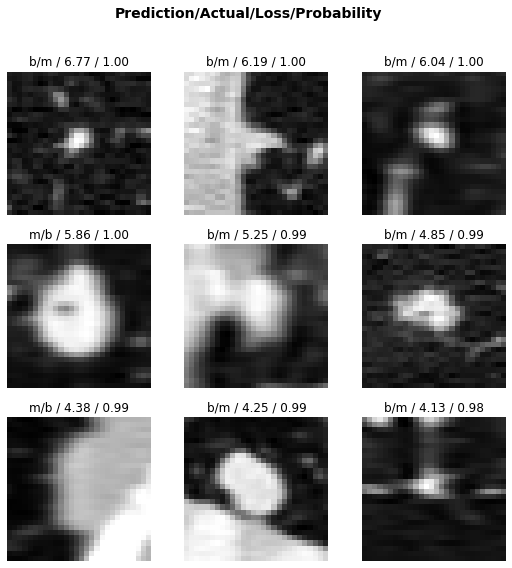

In [ ]:
interp.plot_top_losses(k=9, anatomical_plane=2) 

## Advanced 

In [ ]:
dblock = MedDataBlock(blocks=(ImageBlock(cls=MedImage), CategoryBlock), 
                      splitter=RandomSplitter(seed=42),
                      get_x=ColReader('img_path'),
                      get_y=ColReader('labels'),
                      item_tfms=item_tfms, 
                      reorder=reorder,
                      resample=resample)